<a href="https://colab.research.google.com/github/minlingz/colab/blob/main/exercise_merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging Data to Understand the Relationship between Drug Legalization and Violent Crime



In recent years, many US states have decided to legalize the use of marijuana.

When these ideas were first proposed, there were many theories about the relationship between crime and the "War on Drugs" (the term given to US efforts to arrest drug users and dealers over the past several decades).

In this exercise, we're going to test a few of those theories using drug arrest data from the state of California.

Though California has passed a number of laws lessening penalities for marijuana possession over the years, arguably the biggest changes were in  2010, when the state changed the penalty for possessing a small amount of marijuana from a criminal crime to a "civil" penality (meaning those found guilty only had to pay a fine, not go to jail), though possessing, selling, or producing larger quantities remained illegal. Then in 2016, the state fully legalized marijuana for recreational use, not only making possession of small amounts legal, but also creating a regulatory system for producing marijuana for sale.

Proponents of drug legalization have long argued that the war on drugs contributes to violent crime by creating an opportunity for drug dealers and organized crime to sell and distribute drugs, a business which tends to generate violence when gangs battle over territory. According to this theory, with drug legalization, we should see violent crime decrease after legalization in places where drug arrests had previously been common.

**To be clear,** this is far from the only argument for drug legalization! It is simply the argument we are well positioned to analyze today.

## Ingest


### Ingest county-level data on arrests from California in 2009
We will begin by examining [county-level data on arrests from California in 2009](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca).

In [1]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

ca = pd.read_csv(
    "https://github.com/nickeubank/practicaldatascience/raw/master/Example_Data/ca/ca_arrests_2009.csv"
)

## EDA

### Sample data


In [2]:
ca.sample(5)

,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
50,1732,Sutter County,426,358,173,37,194,1188,2916,184
35,1717,San Bernardino County,8474,10799,8793,720,4916,33702,56648,1119
6,1688,Contra Costa County,2976,3532,2895,189,2069,11661,18539,50
12,1694,Imperial County,599,779,730,28,449,2585,6739,69
46,1728,Siskiyou County,189,145,180,9,163,686,1786,8


### What is the shape: i.e. rows,columns?

In [4]:
ca.shape

(58, 10)

### What are general characteristics of the data? A good way to find out is df.describe

In [6]:
ca.describe()

,Unnamed: 0,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1710.500000,2133.827586,2187.775862,2046.275862,142.913793,1531.293103,8042.086207,16727.948276,520.517241
std,16.886879,4937.729079,4949.115636,4591.867960,303.184460,3270.993593,17992.225337,34113.762098,1562.044019
min,1682.000000,8.000000,4.000000,2.000000,1.000000,1.000000,16.000000,83.000000,0.000000
25%,1696.250000,194.000000,141.250000,135.500000,14.000000,146.500000,637.250000,1541.500000,10.500000
50%,1710.500000,536.500000,518.500000,532.000000,39.000000,474.000000,2084.500000,6267.000000,73.000000
75%,1724.750000,2204.000000,2338.750000,1860.500000,117.750000,1993.500000,8677.500000,16417.250000,386.000000
max,1739.000000,35319.000000,34630.000000,32193.000000,2041.000000,23524.000000,127707.000000,238608.000000,11049.000000


### Ingest
Figuring out what county has the most violent arrests isn't very meaningful if we don't normalize for size. A county with 10 people and 10 arrests for violent crimes is obviously worse than a county with 1,000,000 people an 11 arrests for violent crime.

To address this, also import `nhgis_county_populations.csv` from [the directory we're working from](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca).

In [7]:
ncp = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/ca/nhgis_county_populations.csv"
)

,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
18,1700,Los Angeles County,35319,34630,32193,2041,23524,127707,238608,11049


It is Los Angeles County has the most violent arrests.

### Handle erroneous data in ncp before merging

In [11]:
ncp["COUNTY"] = ncp["COUNTY"].replace(
    ["DelNorte County", "Injo County"], ["Del Norte County", "Inyo County"]
)


### Create a filtered new dataset

In [15]:
ncp_ca_2009=ncp[(ncp.YEAR == "2005-2009") & (ncp.STATE == "California")]

### Merge/Join the two datasets to a new dataset

In [19]:
data_2009 = pd.merge(
    ca,
    ncp_ca_2009,
    on="COUNTY",
    how="left",
    indicator=True,
    validate="1:1",
)


,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,_merge
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431,186,2005-2009,California,1457095,both
1,1683,Alpine County,8,4,2,1,1,16,83,0,187,2005-2009,California,1153,both
2,1684,Amador County,100,59,101,5,199,464,801,2,188,2005-2009,California,38039,both
3,1685,Butte County,641,602,542,34,429,2248,9026,1,189,2005-2009,California,217917,both
4,1686,Calaveras County,211,83,123,14,70,501,968,3,190,2005-2009,California,46548,both
5,1687,Colusa County,58,50,28,7,132,275,917,0,191,2005-2009,California,21001,both
6,1688,Contra Costa County,2976,3532,2895,189,2069,11661,18539,50,192,2005-2009,California,1015571,both
7,1689,Del Norte County,144,104,79,13,97,437,1268,5,193,2005-2009,California,28729,both
8,1690,El Dorado County,570,399,403,45,614,2031,4734,54,194,2005-2009,California,175941,both
9,1691,Fresno County,4377,3514,3508,305,3253,14957,31710,377,195,2005-2009,California,890750,both



### Now that we have arrest counts and population data, we can calculate arrest *rates*.

In [22]:
data_2009["violent_arrest_rate_2009"] = data_2009.VIOLENT / data_2009.total_population
data_2009["drug_arrest_rate_2009"] = data_2009.F_DRUGOFF / data_2009.total_population


### Make a scatter plot that shows the relationship between each county's violent arrest rate and it's drug arrest rate.

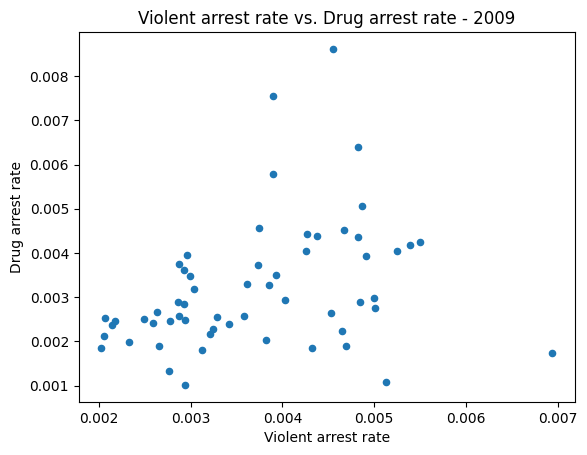

In [23]:
import matplotlib.pyplot as plt

data_2009.plot(x="violent_arrest_rate_2009", y="drug_arrest_rate_2009", kind="scatter")
plt.title("Violent arrest rate vs. Drug arrest rate - 2009")
plt.xlabel("Violent arrest rate")
plt.ylabel("Drug arrest rate")
plt.show()

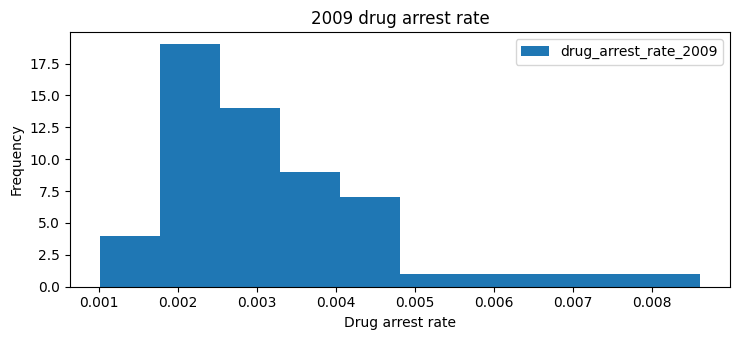

In [47]:
data_2009.plot(y="drug_arrest_rate_2009", kind="hist")
plt.title("2009 drug arrest rate")
plt.xlabel("Drug arrest rate")
plt.show()

As the drug arrest rate increases, the violent arrest rate increases.

### Comparing with 2018 Arrests

The preceding analysis can tell us about whether violent crime and the drug trade are correlated, but it doesn't tell us much about whether they are *causally* related. It *could* be the case that people dealing drugs *cause* more violent crime, but it could also be that certain communities, for some other reason, tend to have *both* more drug sales *and* more violent crime.

To help answer this question, let's examine whether violent crime arrest rates changed in response to drug legalization. In particular, let's do this by comparing violent crime arrest rates in 2009 (before drug legalization) to violent crime arrest rates in 2018 (after drug legalization). If the illegal drug trade causes violent crime, then we would expect the violent crime rate to fall in response to drug legalization.


#### Create 2018 data

Just as we created violent arrest rates and drug arrest rates for 2009, now we want to do it for 2018. Using the data on 2018 arrests (also in the [same repository](https://github.com/nickeubank/practicaldatascience/tree/master/Example_Data/ca) we used before) and the same dataset of population data (you'll have to use population from 2013-2017, as 2018 population data has yet to be released), create a dataset of arrest rates.


In [29]:
import pandas as pd

ca_arrests_2018 = pd.read_csv(
    "https://github.com/nickeubank/practicaldatascience/raw/master/Example_Data/ca/ca_arrests_2018.csv"
)
data_2018 = pd.merge(
    ca_arrests_2018,
    ncp[(ncp.YEAR == "2013-2017") & (ncp.STATE == "California")],
    left_on="COUNTY",
    right_on="COUNTY",
    how="left",
    validate="1:1",
    indicator=True,
)

data_2018["violent_arrest_rate_2018"] = data_2018.VIOLENT / data_2018.total_population
data_2018["drug_arrest_rate_2018"] = data_2018.F_DRUGOFF / data_2018.total_population

#### Merge 2009 data with 2018 data


In [41]:
data = pd.merge(data_2009, data_2018, on="COUNTY", how="inner")[
    [
        "COUNTY",
        "violent_arrest_rate_2009",
        "violent_arrest_rate_2018",
        "drug_arrest_rate_2009",
        "drug_arrest_rate_2018",
    ]
]

#### Make a box plot to show 2009 and 2018 violent arrest rate

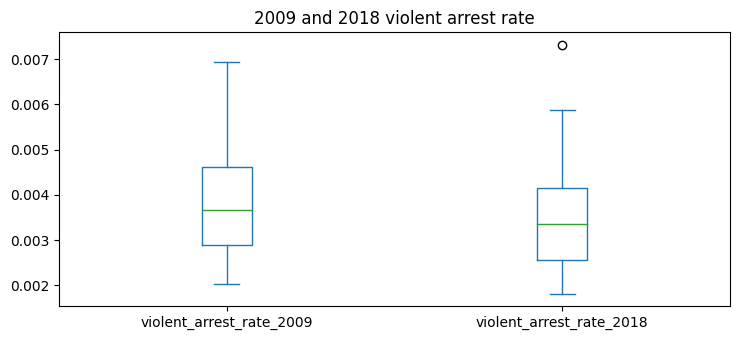

In [48]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = data[['violent_arrest_rate_2009', 'violent_arrest_rate_2018']].plot(kind='box', title='2009 and 2018 violent arrest rate')

# Display the plot
plt.show()